<a href="https://colab.research.google.com/github/acastellanos-ie/ML2-MBD-EN-OCT-2021-S-1/blob/main/ml_pipeline_review/session_2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2: General pipeline for machine learning

In this session we will build a general pipeline for machine learning using scikit-learn and pandas for preprocessing and feature engineering.

# Github

For this course, we are going to use Github as code repository. Github is just another provider for version control using Git.

Version control is a key component of any software development project, machine learning included. It is not the scope of this project to provide a deep understanding of Github or the lifecycle of an ML project; nevertheless, I would like to use the tool so you are familiar with it. You will very likely use Github in your future projects, so I strongly advise you to give it a try.

Very briefly, Github is a platform where you can upload and store your code and share it with your collaborators. It facilitates code sharing by providing the tools that ensure that all the collaborators work with the same code version, thus avoiding conflicts among different versions.

To that end, you create a repository (i.e., you should have a different repo for each project that you are working on) where you can download (pull command) the latest version of the code and upload (push command) your updates to it.

These are just the basics for Git. For more details in Git and Github, I recommend you to check the [Github Learning Lab](https://lab.github.com/) where you can find several courses and learning paths to master Github and its use. You will not require most of this knowledge for the course since we will only use some of the basic Github features. In any case, if you want more details on the different features available, the [First Day](https://lab.github.com/githubtraining/first-day-on-github) and [First Week](https://lab.github.com/githubtraining/first-week-on-github) learning paths will be more than enough.

## Course Repository

I have already created the repository for the course:

https://github.com/acastellanos-ie/ML2-MBD-EN-OCT-2021-S-1

In this repository, you can find the different practices and the related files. As you can see, you do not yet have the solutions to the exercises. I will upload them after the practice sessions.

In the repository, you can also find the details on how to configure the repository in your local computer if you want to execute the files locally. If you prefer to avoid the burden of configuring and running the code on your laptop, we have great (and almost free) alternatives nowadays to do it on the cloud. In particular, for this course, I have prepared the notebooks so you can run them online on Google Colab.

# Google Colab


Colab is an online development environment provided by Google. Colab allows the creation and running of Python Notebooks in the cloud, minimizing the configuration: 

https://research.google.com/colaboratory/

To facilitate the execution of the notebooks in Colab, I have included at the beginning of each one of them a link for it:

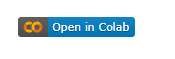

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [1]:
repository_name = "ML2-MBD-EN-OCT-2021-S-1"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [2]:
! git clone $repository_url

Cloning into 'ML2-MBD-EN-OCT-2021-S-1'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 194 (delta 64), reused 114 (delta 43), pack-reused 38
Receiving objects: 100% (194/194), 28.21 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (65/65), done.


Install the requirements

In [3]:
! pip install -Uqqr $repository_name/requirements.txt

     |████████████████████████████████| 507 kB 5.1 MB/s 
     |████████████████████████████████| 11.2 MB 44.4 MB/s 
     |████████████████████████████████| 24.8 MB 1.2 MB/s 
     |████████████████████████████████| 261 kB 56.8 MB/s 
     |████████████████████████████████| 62 kB 765 kB/s 
     |████████████████████████████████| 26.5 MB 1.5 MB/s 
     |████████████████████████████████| 173.5 MB 11 kB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
     |████████████████████████████████| 631 kB 53.6 MB/s 
     |████████████████████████████████| 890 kB 31.2 MB/s 
     |████████████████████████████████| 675 kB 43.9 MB/s 
     |████████████████████████████████| 303 kB 59.9 MB/s 
     |████████████████████████████████| 10.9 MB 40.0 MB/s 
     |████████████████████████████████| 248 kB 46.6 MB/s 
     |████████████████████████████████| 245 kB 55.7 MB/s 
     |████████████████████████████████| 4.7 MB 39.1 MB/s 
     |█████████████

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

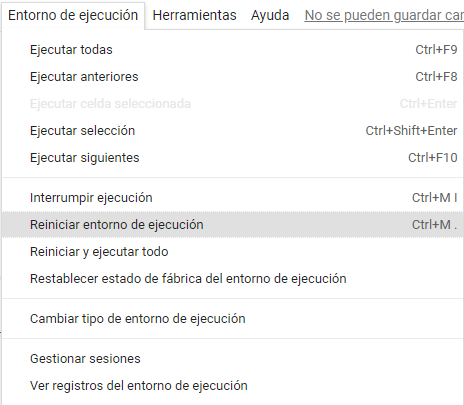

In [1]:
# Figures
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import itertools
from collections import defaultdict
from operator import itemgetter

repository_name = "ML2-MBD-EN-OCT-2021-S-1"

# General pipeline

Consider this a general guide for using Machine Learning to build predictions or recommendations. For every use case there will be parts that might differ, but you can follow this as an initial approach.

Steps:

0. Understanding the problem, the requirements and the goal
1. Data collection
2. Data cleaning
3. Feature engineering
4. Model training
5. Model evaluation

After evaluating our model, there are more steps like visualization, storytelling, reporting, model deployment, model monitoring, etc. These are not covered in this session.


## 0. Understanding the problem, the requirements and the goal

Our problem is that the price of electricity in the wholesale market is subject to a high volatility, therefore by having solid predictions of it, we can control our risk and hedge against it.

The requirements are that we need to provide a prediction as a 24h prediction of this price for every day in a timely manner and with some degree of accuracy.

Our goal, obviously is to obtain a model that can predict the price of electricity in the wholesale market.

## 1. Data collection: reading the data and understanding the goal

In real life, the data is not in a CSV file, but it's rather in a database, in a directory in a bunch of files, in a streaming pipeline, etc. In this session we will use a CSV file as an example.

The data we're going to use is the `energy` dataset that we've used in the past, and our goal is to create a Machine Learning model that predicts the spot price of electricity in Spain given some power market variables.

With this approach, we will train an algorithm to learn the relationship between the variables (x) and the target variable (`spot_price`, y).

In [2]:
energy = pd.read_csv(repository_name + "/ml_pipeline_review/dataset/energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


Now that we have our data as a DataFrame, we can use all the data analysis techniques we know to understand the problem.

Let's now visualize the dataset to see where to begin. To that end, I recommend you to use Pandas Profile Report to have a "quick" (i.e., it will be actually quite slow since we have many features) view of the dataset.

In [ ]:
profile = ProfileReport(energy, title="Pandas Profiling Report", minimal=False)
profile

## 2. Data cleaning: preparing the data and analyzing it.

So far, we have read the dataset and we have a convenient pandas dataframe to play around with. Datasets are collections of data points gathered from real-world processes and scenarios. Henceforth, they are very likely to be messy (the real world is!). Before even thinking about training our model, we need to deal with this messiness. Today I am just introducing the idea so you see how it fits into an ML pipeline. We will devote the next session to a more in-depth review of this data cleaning process.

Although the data cleaning step has to be informed by the previous analysis of the data (e.g., have you seen something odd in the data? is there any error to correct?), there are some things to keep in mind when working in Machine Learning:
* The distribution of the data is important; both $X$ and $y$
    * Are there any outlier values? what should we do with them?
    * Should we normalize the data?
    * Should we standardize the data?
* Do we have categorical features? Should we encode them?
* The dates should be in a format that can be parsed by pandas but not passed to our algorithm
* We need a strategy for NaN/missing values


In [4]:
# convert date column to datetime
energy["datetime"] = pd.to_datetime(energy["datetime"])

Now that we have our data in a DataFrame, we can use all the data analysis techniques we know to understand the problem.

Let's assess the distribution of the data. I'm going to use Seaborn to do this.

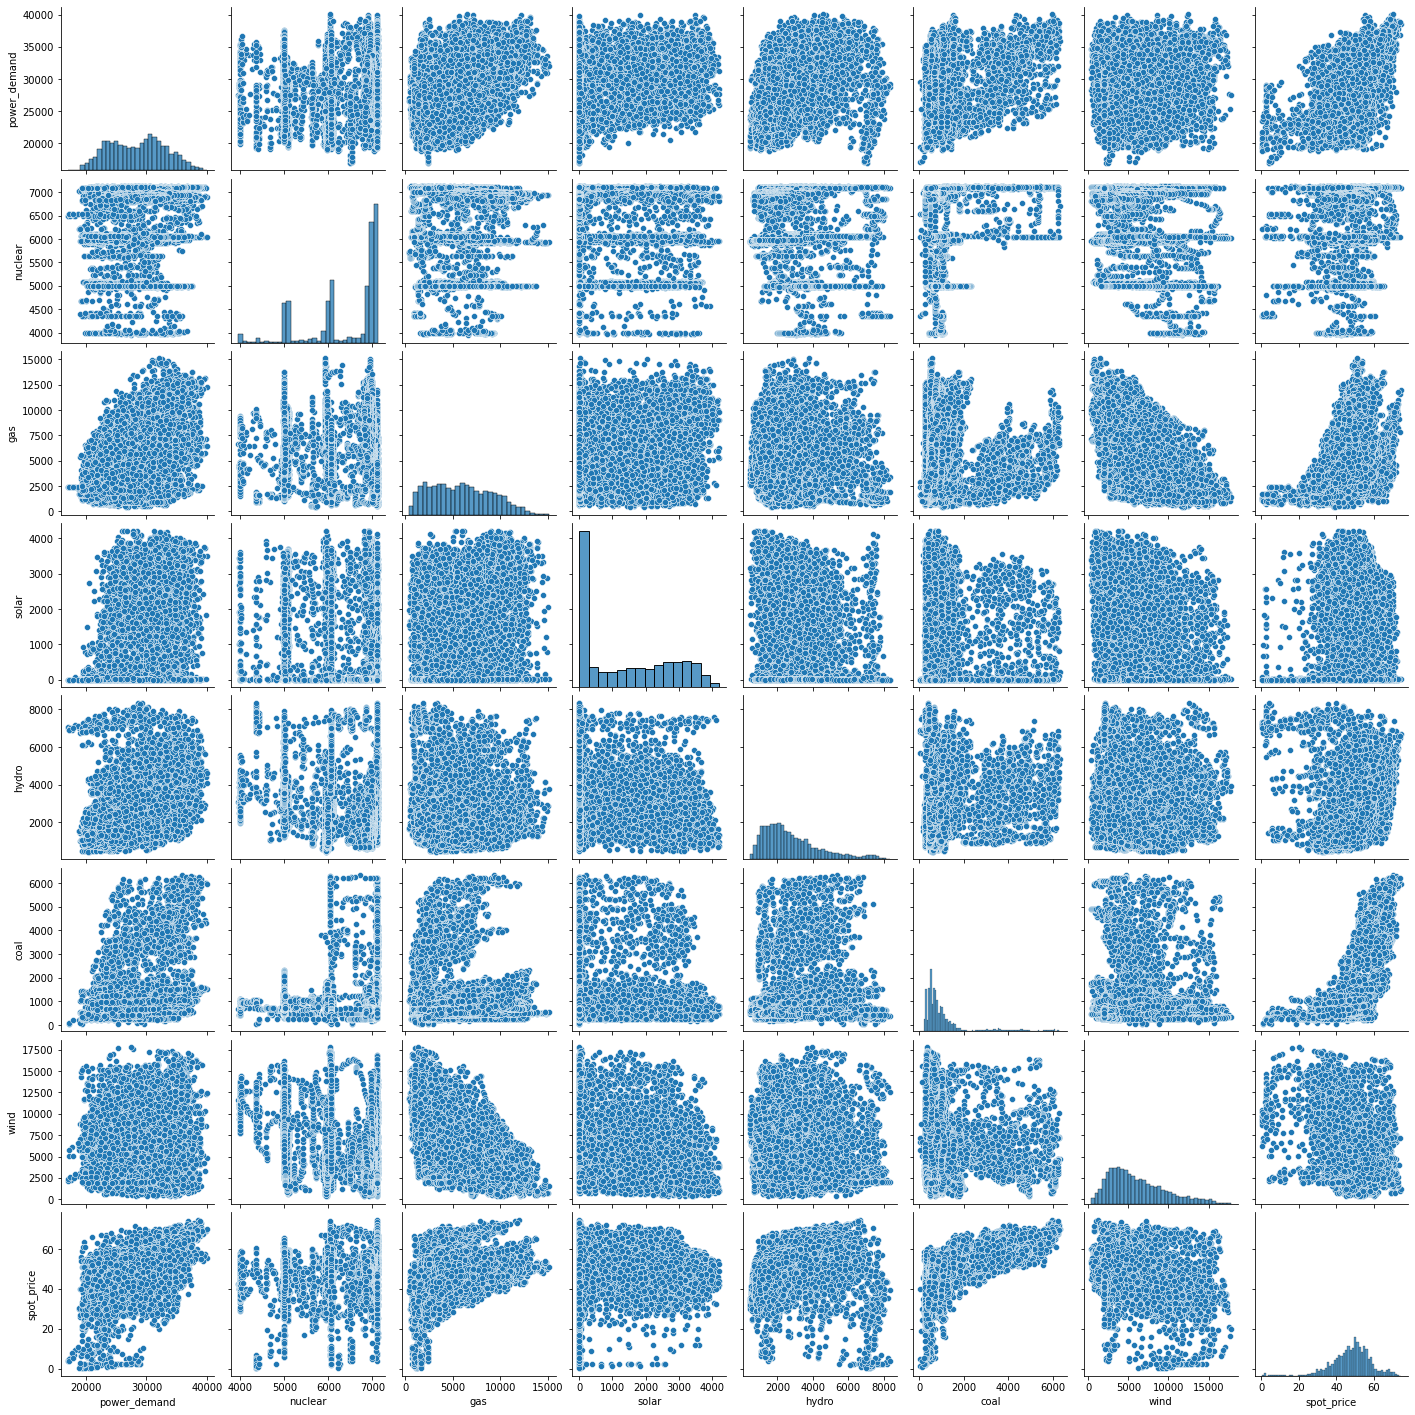

In [7]:
# checking distributions of data
cols_for_distrib = [
    "power_demand",	"nuclear", "gas", "solar", "hydro",	"coal",	"wind",	"spot_price"
]
sns.pairplot(energy[cols_for_distrib]);

We see that there are some features that are not normally distributed, like the `wind` and `solar`.

Also, `nuclear` looks binned, which sounds like a categorical feature. 

In general there's some skew in our variables that we can deal with. 

### Null Values

Null values are related to values that are missing in the data. 

In the following practice we will cover NULL values, the different considerations to take into account, as well as how to impute them.

For now we will just focus on identify them and correct them.


In [6]:
# nan/missing values

energy.isna().mean()

datetime        0.000000
power_demand    0.000000
nuclear         0.000000
gas             0.000000
solar           0.273778
hydro           0.000000
coal            0.017054
wind            0.000000
spot_price      0.000000
year            0.000000
month           0.000000
day             0.000000
hour            0.000000
weekday         0.000000
dtype: float64

We see some NaN in `solar` and `coal`. Let's dig deeper.

In [8]:
# analyze NaN in `solar`

energy[
    (energy["solar"].isna())
]["hour"].unique()

array([23,  0,  1,  2,  3,  4, 19, 20, 21, 22, 18,  5])

In [9]:
# analyze NaN in `coal`

energy[
    (energy["coal"].isna())
]["hour"].unique()

array([23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

For solar it's clear: it's at nighttime. For coal, though, it's not so clear. The point, luckily, is that we can consider there's no power generation with those technologies, and therefore use 0 to fill NaN!

In [10]:
energy.fillna(0, inplace=True)

## 3. Feature engineering: creating new features and cleaning the data

In this stage, we will create new information based on what we've found in the data analysis and cleaning. It's crucial to include the domain knowledge we have in this stage. If we don't have that knowledge, ask your colleagues, ask your boss, ask your friends, or read. It's the domain knowledge that we need to make our model work well.

Since this is a crucial step in your machine learning solution, we will have a separate session to review it in more detail. For now, let's focus on creating some features to encode some domain knowledge about the Spanish Power Market.

### 3.1. Dealing with nuclear feature:

We saw some bins, let's create categories out of them.

We know that, in Spain, the nuclear reactors average 1000 MW of power, so we can guess how many nuclear reactors are available at each hour by dividing by 1000 and keeping the integer part.

In [14]:
energy["nuclear_available"] = energy["nuclear"].map(lambda x: int(x/1000))
energy['nuclear_available'].unique()

array([6, 5, 7, 4, 3])

### 3.2. Creating new features

* Using domain knowledge: `thermal_gap`
* Using lags and rolling windows to convert a timeseries problem into a supervised learning problem

In [15]:
energy["thermal_gap"] = (
    energy["power_demand"] - 
    energy["nuclear"] -
    energy["wind"] - 
    energy["solar"]
)

In [16]:
# let's check correlations
energy.corr()[["spot_price"]].sort_values("spot_price")

,spot_price
month,-0.526890
wind,-0.354866
weekday,-0.192503
year,-0.018852
day,-0.018006
solar,0.053682
hydro,0.070018
nuclear,0.191179
hour,0.207413
nuclear_available,0.253885


In [17]:
lags = [1, 2, 6]
windows = [2, 6, 12]

cols_feat_eng = [
    "power_demand",	"nuclear", "gas", "solar", "hydro",	"coal",	"wind"
]

# lags of features
for col in cols_feat_eng:
    for lag in lags:
        energy[f"{col}_lag{lag}"] = energy[col].shift(lag)
    for window in windows:
        energy[f"{col}_mean{window}"] = energy[col].rolling(window).mean()
        
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,nuclear_available,thermal_gap,power_demand_lag1,power_demand_lag2,power_demand_lag6,power_demand_mean2,power_demand_mean6,power_demand_mean12,nuclear_lag1,nuclear_lag2,nuclear_lag6,nuclear_mean2,nuclear_mean6,nuclear_mean12,gas_lag1,gas_lag2,gas_lag6,gas_mean2,gas_mean6,gas_mean12,solar_lag1,solar_lag2,solar_lag6,solar_mean2,solar_mean6,solar_mean12,hydro_lag1,hydro_lag2,hydro_lag6,hydro_mean2,hydro_mean6,hydro_mean12,coal_lag1,coal_lag2,coal_lag6,coal_mean2,coal_mean6,coal_mean12,wind_lag1,wind_lag2,wind_lag6,wind_mean2,wind_mean6,wind_mean12
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,6,13354.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1,6,13245.7,23251.2,NaN,NaN,22868.1,NaN,NaN,6059.2,NaN,NaN,6059.2,NaN,NaN,2954.0,NaN,NaN,2999.05,NaN,NaN,7.1,NaN,NaN,7.55,NaN,NaN,3202.8,NaN,NaN,3043.60,NaN,NaN,1867.0,NaN,NaN,1742.50,NaN,NaN,3830.3,NaN,NaN,3501.20,NaN,NaN
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1,6,11929.8,22485.0,23251.2,NaN,21731.0,NaN,NaN,6059.2,6059.2,NaN,6059.2,NaN,NaN,3044.1,2954.0,NaN,3091.35,NaN,NaN,8.0,7.1,NaN,7.75,NaN,NaN,2884.4,3202.8,NaN,2417.60,NaN,NaN,1618.0,1867.0,NaN,1576.65,NaN,NaN,3172.1,3830.3,NaN,3076.30,NaN,NaN
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1,6,10847.5,20977.0,22485.0,NaN,20365.6,NaN,NaN,6059.2,6059.2,NaN,6059.2,NaN,NaN,3138.6,3044.1,NaN,3367.40,NaN,NaN,7.5,8.0,NaN,7.50,NaN,NaN,1950.8,2884.4,NaN,1813.25,NaN,NaN,1535.3,1618.0,NaN,1439.65,NaN,NaN,2980.5,3172.1,NaN,2910.25,NaN,NaN
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1,6,9996.3,19754.2,20977.0,NaN,19537.4,NaN,NaN,6059.2,6059.2,NaN,6061.3,NaN,NaN,3596.2,3138.6,NaN,3394.40,NaN,NaN,7.5,7.5,NaN,7.50,NaN,NaN,1675.7,1950.8,NaN,1628.75,NaN,NaN,1344.0,1535.3,NaN,1344.50,NaN,NaN,2840.0,2980.5,NaN,3046.70,NaN,NaN


In [18]:
energy.corr()[["spot_price"]].sort_values("spot_price")

,spot_price
month,-0.526890
wind_mean6,-0.358318
wind_lag2,-0.357360
wind_lag1,-0.357187
wind_mean2,-0.356428
wind,-0.354866
wind_mean12,-0.352124
wind_lag6,-0.345837
weekday,-0.192503
hydro_lag6,-0.185867


In [19]:
# shape of dataset
energy.shape

(8737, 58)

In [20]:
# drop NaN values from feature engineering
energy.dropna(inplace=True)

## 4. Model training: training the model

Let's start with the fun part (~5% of data science): machine learning. This is the "sexy" part, where you train and put into practice the fancy Machine Learning algorithms that you are likely to have read about (XGboost, RandomForest, Deep Neural Nets,...).

We will devote several sessions to reviewing some of these algorithms. In the next term, you will complement this view with Deep Neural Nets in ML3. However, no matter the algorithm you use, the process is rather similar:
You pick the ML algorithm/s that best suits your problem and data.
You use your training dataset to train these model/s.
You evaluate them with the validation/test datasets.
You finally select the best-performing one according to some performance metric.
Please don't panic; we will review each one of these aspects in the following sessions. For now, let's use a simple Regression Model in practice.


For the Model Training, we will leverage on [scikit-learn](https://scikit-learn.org/stable/index.html), a *de facto* standard library for Machine Learning that you are already familiar with (i.e., in the following sessions, we will also use scikit-learn for other pre-processing steps). 

Since scikit-learn will be an essential part of the practical sessions, I strongly recommend you get familiar with it. Luckily, scikit-learn is rather straightforward and they have excellent documentation and tutorials. Check out the following link:
https://scikit-learn.org/stable/tutorial/index.html.

No more talking; let's start. The first thing to do is to select the Machine Learning algorithm that we want to use. For simplicity, we will use [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

To use any scikit-learn model, you need to import the model and to "instantiate" it (i.e., to call the constructor of the model to create an empty model).

In [24]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model

LinearRegression()

Great, we have the model, but as I told you, it is empty. We need to "train" the model, i.e., to expose the model to the training dataset, including datapoints (described by their features) and the correct label to each datapoint. We expect the model to be able to learn the function that predicts the right label for each datapoint based on its features (e.g., in our case, what is a good predictor for the price of the energy).

So, let's prepare our dataset for it. Right now, our dataset is included in the `energy` object. We need to divide the dataset into two new objects: one including the features (i.e., predictors), usually called $X$,  and another one including just the label, usually called $y$. 

In [26]:
# lets prepare the data for splitting: x and y
# x: features, y: target

X = energy.drop(["datetime", "spot_price"], axis=1)
y = energy["spot_price"]

Done! With these two objects, we could train our model. However, we would have a problem if we did it in this way. Can you tell me which one?

Let's split the dataset into training and test to avoid it. In the following sessions, especially in the one devoted to evaluating machine learning models, we will learn a more advanced way of doing it, but this simple training/test splitting will suffice for now.

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42
)

Everything is ready now. We have the training data for the model training and the test dataset for the evaluation of the model.

The model training is the same for all ML models in scikit-learn. We have a `fit` function that takes the training data (predictors `x_train` and their labels `y_train`). More details are in the following link: https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting. 

In [29]:
# train the model
lr_model.fit(x_train, y_train)


LinearRegression()

With the model `lr_model` already trained, we can request predictions for unseen data (the test set `x_test`). To that end, scikit-learn provides the `predict` function that takes the test set as input. This method predicts the most likely label $\hat{y}$ for each datapoint in the test set, according to what it learned in the training process.

In [33]:
# create prediction
y_hat = lr_model.predict(x_test)

To have a confirmation on the model performance, we can plot the actual labels for the datapoints in the test set versus the ones predicted by the model.

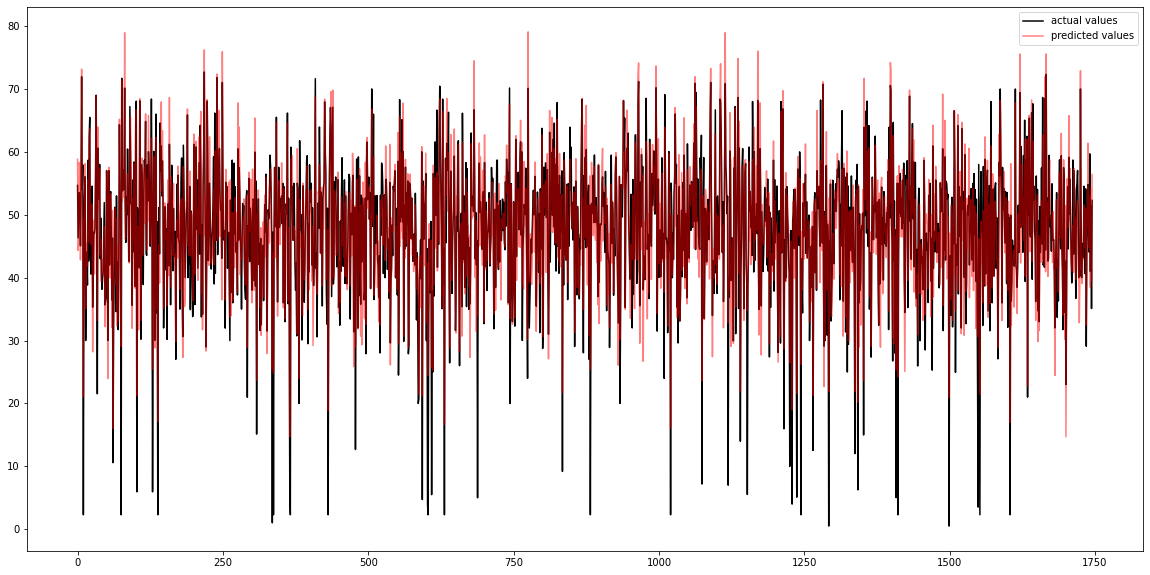

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(y_test.values, label="actual values", c="black")
ax.plot(y_hat, label="predicted values", c="red", alpha=0.5)
ax.legend();

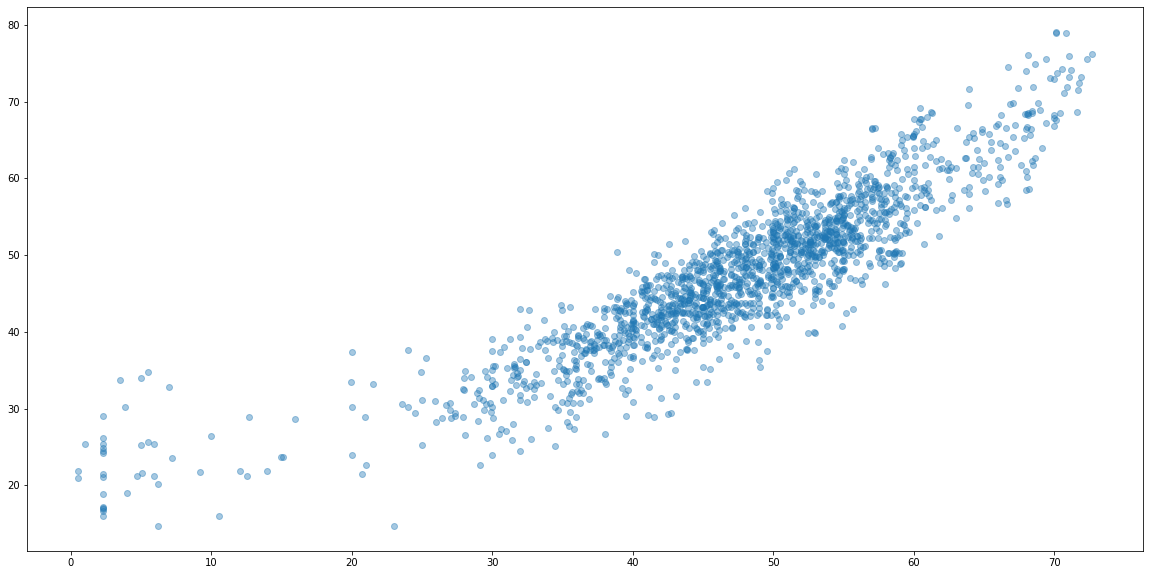

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(y_test.values, y_hat, alpha=0.4);

It seems that the model is not bad. However, this validation is not very scientific. Moreover, it won't be easy to compare two models by just watching these graphs. Therefore, we need a more systematic (and scientific) evaluation of ML models. The solution is to define some performance metric that basically compares the prediction and the actual values and computes the difference. There are literally hundreds of such metrics. We will cover the most important ones in the session devoted to the ML models evaluation. Today, we will use a simple metric to compute the average error (i.e., the difference between the predicted and actual value).

## 5. Model Evaluation

Now we've created a prediction model, we can evaluate it. We can do this by comparing the predictions (`y_hat`) with the actual values (`y_test`).

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
# how good is the model?

# assess the model's performance by using MSE: mean squared error
# MSE = mean( (y_hat - y_test)^2 )

mse = mean_squared_error(y_test, y_hat)

print(mse)

26.127202607186963


An average error of 26 units. Is this good? Not quite, as we can see in the following cell, the average value for the target variable is around 46. In other words, the error is more than 50% of the original value.

In [43]:
np.mean(y_test)

47.43349369988538

We can see that the model doesn't have a perfect fit, but it's still a good fit.

At this point, in order to improve the performance, we have several options, not mutually exclusive:
* Get more data
* Get better data
* Get more domain knowledge
* Select a more "intelligent" algorithm
* Fine tune the algorithm
* Control underfitting / overfitting